## Trip Adviser DataSet

Первоначальная версия датасета состоит из десяти столбцов, содержащих следующую информацию:

- Restaurant_id — идентификационный номер ресторана / сети ресторанов;
- City — город, в котором находится ресторан;
- Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
- Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;
- Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
- Price Range — диапазон цен в ресторане;
- Number of Reviews — количество отзывов о ресторане;
- Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;
- URL_TA — URL страницы ресторана на TripAdvosor;
- ID_TA — идентификатор ресторана в базе данных TripAdvisor.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [2]:
def cols_to_lower(data):
    data_cols=[]
    for i in data.columns:
        i=i.replace(" ", "_").lower()
        data_cols.append(i)
    return data_cols

In [3]:
data=pd.read_csv("main_task.csv")
data.columns=cols_to_lower(data)
data.head()

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
restaurant_id        40000 non-null object
city                 40000 non-null object
cuisine_style        30717 non-null object
ranking              40000 non-null float64
rating               40000 non-null float64
price_range          26114 non-null object
number_of_reviews    37457 non-null float64
reviews              40000 non-null object
url_ta               40000 non-null object
id_ta                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


### 2.1 Задание 1

Какие столбцы НЕ содержат пропущенных (None) значений?

### ANS:

Restaurant_id        40000 non-null object

City                 40000 non-null object

Ranking              40000 non-null float64

Rating               40000 non-null float64

Reviews              40000 non-null object

URL_TA               40000 non-null object

ID_TA                40000 non-null object


### 2.2 Задание 2

В каких столбцах данные хранятся в числовом формате?

### ANS:

Ranking              40000 non-null float64

Rating               40000 non-null float64

Number of Reviews    37457 non-null float64


### 2.3 Задание 3

В каких столбцах хранящиеся данные представляют собой список?

### ANS:

Cuisine Style, Reviews - на самом деле это строки, т.е. тут нет списков

### 3.1 Вопрос для размышления

По какой причине во время обучения модели возникла ошибка Value Error?

### ANS: 

Ошибка возникла при обработке столбца со строковыми значениями. Следовательно, для обучения модели все данные должны быть переданы только в числовом формате.

Таким образом, чтобы код, отвечающий за обучение модели, заработал, мы должны использовать в нём датафрейм, содержащий только количественные признаки и не содержащий None-значений. На первом этапе для создания такого датафрейма давайте просто удалим столбцы, содержащие данные типа object, и заполним пропущенные значения (None или NaN) каким-то одним значением (нулём или средним арифметическим) для  всего столбца.

In [5]:
data=data.fillna(0)

In [6]:
data.isnull().sum()

restaurant_id        0
city                 0
cuisine_style        0
ranking              0
rating               0
price_range          0
number_of_reviews    0
reviews              0
url_ta               0
id_ta                0
dtype: int64

In [7]:
data.head(10)

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,0,1537.0,4.0,0,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,0,3458.0,5.0,0,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
5,id_1418,Oporto,0,1419.0,3.0,0,2.0,"[['There are better 3 star hotel bars', 'Amazi...",/Restaurant_Review-g189180-d12503536-Reviews-D...,d12503536
6,id_1720,Milan,"['Italian', 'Pizza']",1722.0,4.0,$,50.0,"[['Excellent simple local eatery.', 'Excellent...",/Restaurant_Review-g187849-d5808504-Reviews-Pi...,d5808504
7,id_825,Bratislava,['Italian'],826.0,3.0,0,9.0,"[['Wasting of money', 'excellent cuisine'], ['...",/Restaurant_Review-g274924-d3199765-Reviews-Ri...,d3199765
8,id_2690,Vienna,0,2692.0,4.0,0,0.0,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029
9,id_4209,Rome,"['Italian', 'Pizza', 'Fast Food']",4210.0,4.0,$,55.0,"[['Clean efficient staff', 'Nice little pizza ...",/Restaurant_Review-g187791-d8020681-Reviews-Qu...,d8020681


In [8]:
# удалим object-features
data=data.drop(['restaurant_id','city','cuisine_style','reviews','url_ta','id_ta','price_range'], axis=1)
data.head()

,ranking,rating,number_of_reviews
0,5570.0,3.5,194.0
1,1537.0,4.0,10.0
2,353.0,4.5,688.0
3,3458.0,5.0,3.0
4,621.0,4.0,84.0


### Создадим функцию для тестирования модели

In [9]:
def test_my_model(data):
    X = data.drop(['rating'], axis = 1)
    y = data['rating']
    # Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
    # Для тестирования мы будем использовать 25% от исходного датасета.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    # Создаём модель
    regr = RandomForestRegressor(n_estimators=100)

    # Обучаем модель на тестовом наборе данных
    regr.fit(X_train, y_train)

    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
    # Предсказанные значения записываем в переменную y_pred
    y_pred = regr.predict(X_test)
    # Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
    # Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
    return metrics.mean_absolute_error(y_test, y_pred)

### Как узнать, что модель хорошая?

Для оценки точности прогнозов, сделанных моделью, мы будем использовать метрику (показатель), которая называется Mean Absolute Error, и представляет собой среднее абсолютное значение отклонения предсказанных значений от фактических:

<img src="DST_th1_MAE.png">

Иными словами, если у вас получился результат MAE = 0.5, то это значит, что модель при расчёте рейтинга ошибается в среднем на 0.5 баллов. 

In [10]:
# проверим получившуюся модель
test1=test_my_model(data)
test1

0.42432210914502155

Полученный результат далек от идеала!

### 4. Сделайте с этим что-нибудь!

#### Что нужно сделать на этом шаге?

Повысить точность прогнозов, которые делает модель, с помощью более тщательной подготовки данных. При подготовке датасета нужно будет не только избавиться от пропущенных (None) значений и нечисловых признаков, но и сгенерировать новые признаки (добавить в датафрейм новые столбцы) на основе информации, уже содержащейся в данных.

С одной стороны, всё просто. Задачу, которая стоит перед вами, можно свести к трём пунктам:

1. Удалить из датафрейма столбцы, данные в которых представлены не числами (это вы уже сделали, и нужно просто повторить знакомые действия, но в этот раз выполнить данный шаг в последнюю очередь).
2. Избавиться от пропущенных (None) значений (на предыдущем шаге мы делали это самым грубым из всех возможных способов; сейчас попробуем подойти к процессу более гибко).
3. Создать новые столбцы с данными, используя для этого информацию, содержащуюся в других столбцах датафрейма (например, можно добавить столбец, сообщающий, сколько дней прошло со дня публикации последнего отзыва, отображённого на сайте).

С другой стороны, в этом задании масса подводных камней.

#### Строковые данные
В исходном наборе данных всего три столбца содержат числовые данные, причём один из этих столбцов — это целевая переменная, значение которой должна предсказывать наша модель. Так что просто удалить все object-значения и считать задачу выполненной не получится. Для создания качественной модели нам сначала придётся очень основательно поработать со строковыми данными и извлечь из них как можно больше информации, которую можно представить в числовом виде.

#### Пропущенные значения
Мы уже говорили о том, что в задачах по машинному обучению принято не удалять строки с пустыми значениями, а заполнять их максимально близкими к реальности данными. Как найти такие данные — большой вопрос, требующий не только знания синтаксиса, но и креативности, изобретательности, хорошего понимания контента, а иногда ещё и интуиции. 

#### Новые признаки
Это, пожалуй, самая сложная, но и самая интригующая, увлекательная и творческая часть работы на данном шаге. Создание новых признаков (Feature Engineering) потребует от вас не только хорошего владения разными библиотеками Python, но и способность вникать в контент, умение подключать к работе интуицию, творческий подход и готовность к экспериментам.

#### Подсказки без подсказок
По условию нашего курса при выполнении этого задания у каждого студента должен получиться свой уникальный датафрейм, содержащий уникальный набор признаков. Иными словами, мы не стремимся привести всех к единому результату и одинаковому "единственно правильному" набору признаков. В то же время у нас есть определённое представление о том, какие признаки точно можно сгенерировать на основе набора данных, который вы получили для работы.

Ниже мы разместили несколько вопросов, для ответов на которые вам нужно будет создать столбцы с теми самыми числовыми признаками, которые в дальнейшем могут быть полезны при обучении модели. Отвечать на них не обязательно, но проработав эти вопросы, вам будет проще понять, какие признаки можно извлечь из данных.

Заново загрузим дата сет и приведем названия колонок к единовму стилю (camel_case, все буквы маленькие).

In [11]:
data=pd.read_csv("main_task.csv")
data.columns=cols_to_lower(data)
data.columns

Index(['restaurant_id', 'city', 'cuisine_style', 'ranking', 'rating',
       'price_range', 'number_of_reviews', 'reviews', 'url_ta', 'id_ta'],
      dtype='object')

### 4.1 Вопросы о ценах

Сколько вариантов непустых значений встречается в столбце Price Range?

In [12]:
data['price_range'].value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: price_range, dtype: int64

Как в датафрейме обозначается самый низкий уровень цен?

$

Как в датафрейме обозначается самый высокий уровень цен?
```
$$$$
```

Сколько ресторанов относятся к среднему ценовому сегменту?

18412

Добавим в data frame колонку признак отсутствия данных в price_range

In [13]:
data['price_nan'] = data['price_range'].isna()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
restaurant_id        40000 non-null object
city                 40000 non-null object
cuisine_style        30717 non-null object
ranking              40000 non-null float64
rating               40000 non-null float64
price_range          26114 non-null object
number_of_reviews    37457 non-null float64
reviews              40000 non-null object
url_ta               40000 non-null object
id_ta                40000 non-null object
price_nan            40000 non-null bool
dtypes: bool(1), float64(3), object(7)
memory usage: 3.1+ MB


Заменим уровень цен на низкий, средний, высокий - ```$, $$-$$$, $$$$.```
Nan заполним средним значением.

In [15]:
data['price_range'].fillna('$$ - $$$', inplace=True)

In [16]:
price_range_dict = {
    '$': 1,
    '$$ - $$$': 2,
    '$$$$': 3
}
data['price_range'] = data['price_range'].map(price_range_dict)
data.head()

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,price_nan
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,False
1,id_1535,Stockholm,NaN,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,True
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,False
3,id_3456,Berlin,NaN,3458.0,5.0,2,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,True
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,False


Гистограмма распределения для price_range:

In [17]:
data['price_range'].unique()

array([2, 3, 1], dtype=int64)

In [18]:
data['price_range'].hist(bins=3)

### 4.2 Вопрос о городах

Сколько городов представлено в наборе данных?

In [19]:
data['city'].nunique()

31

Закодируем каждое название города числом, используем sklearn.preprocessign.LabelEncoder

In [20]:
city_label = LabelEncoder()
city_label.fit(data['city'])
data['city_label'] = city_label.transform(data['city'])
data.head()

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,price_nan,city_label
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,False,24
1,id_1535,Stockholm,NaN,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,True,27
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,False,16
3,id_3456,Berlin,NaN,3458.0,5.0,2,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,True,3
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,False,21


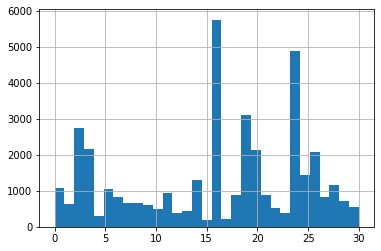

In [21]:
data['city_label'].hist(bins=31)

### 4.3 Вопросы о кухнях

Сколько типов кухонь представлено в наборе данных?

In [22]:
data['cuisine_style']

0                  ['European', 'French', 'International']
1                                                      NaN
2        ['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...
3                                                      NaN
4        ['German', 'Central European', 'Vegetarian Fri...
                               ...                        
39995    ['Italian', 'Vegetarian Friendly', 'Vegan Opti...
39996    ['French', 'American', 'Bar', 'European', 'Veg...
39997                                ['Japanese', 'Sushi']
39998    ['Polish', 'European', 'Eastern European', 'Ce...
39999                                          ['Spanish']
Name: cuisine_style, Length: 40000, dtype: object

In [23]:
import collections
import re

cuisines=[]
for c in data[data['cuisine_style'].isnull()==False].cuisine_style:
    str_c=c.split(',')
    for i in str_c:
        i = re.sub(r"[^a-zA-Z0-9]+", '', i)
        cuisines.append(i)
cuisines

['European',
 'French',
 'International',
 'Japanese',
 'Sushi',
 'Asian',
 'Grill',
 'VegetarianFriendly',
 'VeganOptions',
 'GlutenFreeOptions',
 'German',
 'CentralEuropean',
 'VegetarianFriendly',
 'Italian',
 'Pizza',
 'Italian',
 'Italian',
 'Pizza',
 'FastFood',
 'Italian',
 'Pizza',
 'VegetarianFriendly',
 'Italian',
 'Pizza',
 'VegetarianFriendly',
 'GlutenFreeOptions',
 'VegetarianFriendly',
 'GlutenFreeOptions',
 'Mediterranean',
 'Spanish',
 'Healthy',
 'Cafe',
 'Japanese',
 'Asian',
 'Thai',
 'Vietnamese',
 'Bar',
 'Pub',
 'German',
 'Chinese',
 'German',
 'VegetarianFriendly',
 'Bar',
 'British',
 'Pub',
 'Asian',
 'Thai',
 'VegetarianFriendly',
 'GlutenFreeOptions',
 'VeganOptions',
 'Cafe',
 'British',
 'Polish',
 'International',
 'European',
 'Fusion',
 'Dutch',
 'European',
 'Vietnamese',
 'Italian',
 'Pizza',
 'Italian',
 'Mexican',
 'Venezuelan',
 'SouthAmerican',
 'Italian',
 'Japanese',
 'Sushi',
 'Asian',
 'French',
 'Bar',
 'Cafe',
 'Mediterranean',
 'Pub',
 'A

Добавим столбец, где выделим отсутствие кухни в данных.

In [24]:
data['cuisine_nan'] = data['cuisine_style'].isna()
data.head()

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,price_nan,city_label,cuisine_nan
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,False,24,False
1,id_1535,Stockholm,NaN,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,True,27,True
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,False,16,False
3,id_3456,Berlin,NaN,3458.0,5.0,2,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,True,3,True
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,False,21,False


In [25]:
len(set(cuisines))

125

Какая кухня представлена в наибольшем количестве ресторанов? Введите название кухни без кавычек или апострофов.

In [26]:
c = collections.Counter()
for i in cuisines:
    c[i] += 1
c.most_common(1)

[('VegetarianFriendly', 11189)]

Какое среднее количество кухонь предлагается в одном ресторане? Если в данных отсутствует информация о типах кухонь, то считайте, что в этом ресторане предлагается только один тип кухни. Ответ округлите до одного знака после запятой.

Пустые значения заполним стандартной кухней.

In [27]:
data['cuisine_style'].fillna('Standard', inplace=True)

Вычисляем среднее количество кухонь.

In [28]:
li=[] 
for c in data.cuisine_style:
    str_c=c.split(',')
    li.append(len(str_c))
li

[3,
 1,
 7,
 1,
 3,
 1,
 2,
 1,
 1,
 3,
 1,
 3,
 4,
 2,
 3,
 1,
 4,
 2,
 1,
 1,
 2,
 1,
 3,
 5,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 4,
 1,
 3,
 1,
 1,
 4,
 3,
 5,
 1,
 1,
 1,
 1,
 5,
 4,
 3,
 2,
 1,
 2,
 6,
 7,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 6,
 1,
 5,
 3,
 1,
 2,
 2,
 2,
 3,
 1,
 2,
 1,
 6,
 4,
 2,
 8,
 5,
 3,
 6,
 1,
 6,
 5,
 1,
 1,
 5,
 1,
 1,
 2,
 2,
 4,
 2,
 3,
 1,
 3,
 2,
 1,
 1,
 3,
 3,
 2,
 2,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 5,
 2,
 3,
 1,
 3,
 1,
 1,
 1,
 5,
 1,
 4,
 6,
 3,
 4,
 6,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 7,
 4,
 1,
 3,
 3,
 8,
 2,
 1,
 1,
 2,
 1,
 3,
 4,
 1,
 2,
 6,
 5,
 3,
 1,
 3,
 1,
 2,
 1,
 5,
 2,
 3,
 1,
 3,
 3,
 5,
 1,
 3,
 3,
 1,
 2,
 1,
 5,
 2,
 3,
 5,
 1,
 1,
 2,
 4,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 7,
 6,
 1,
 5,
 3,
 4,
 6,
 3,
 1,
 1,
 5,
 4,
 1,
 5,
 4,
 5,
 5,
 4,
 1,
 1,
 5,
 2,
 4,
 3,
 5,
 1,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 5,
 1,
 1,
 1,
 4,
 1,
 2,
 1,
 2,
 6,
 2,
 3,
 1,
 7,
 6,
 5,
 4,
 1,
 1,
 1,
 2,
 2,
 7,
 1,
 2,
 4,
 1,


In [29]:
sum(li)/len(li)

2.6224

Добавим количество кухонь в ресторане как отдельный признак.

In [30]:
data['num_cuisines']=li

In [31]:
data.head()

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,price_nan,city_label,cuisine_nan,num_cuisines
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,False,24,False,3
1,id_1535,Stockholm,Standard,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,True,27,True,1
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,False,16,False,7
3,id_3456,Berlin,Standard,3458.0,5.0,2,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,True,3,True,1
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,False,21,False,3


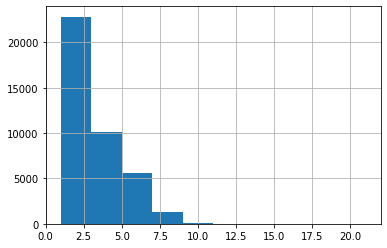

In [32]:
data['num_cuisines'].hist(bins=10)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
restaurant_id        40000 non-null object
city                 40000 non-null object
cuisine_style        40000 non-null object
ranking              40000 non-null float64
rating               40000 non-null float64
price_range          40000 non-null int64
number_of_reviews    37457 non-null float64
reviews              40000 non-null object
url_ta               40000 non-null object
id_ta                40000 non-null object
price_nan            40000 non-null bool
city_label           40000 non-null int32
cuisine_nan          40000 non-null bool
num_cuisines         40000 non-null int64
dtypes: bool(2), float64(3), int32(1), int64(2), object(6)
memory usage: 3.6+ MB


### 4.4 Вопросы об отзывах

В number_of_reviews есть выбросы, закодируем их отдельным признаком.

In [34]:
data['nan_num_reviews'] = pd.isna(data['number_of_reviews'])
data.head()

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,price_nan,city_label,cuisine_nan,num_cuisines,nan_num_reviews
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,False,24,False,3,False
1,id_1535,Stockholm,Standard,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,True,27,True,1,False
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,False,16,False,7,False
3,id_3456,Berlin,Standard,3458.0,5.0,2,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,True,3,True,1,False
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,False,21,False,3,False


In [35]:
data[data['nan_num_reviews']==True]

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,price_nan,city_label,cuisine_nan,num_cuisines,nan_num_reviews
8,id_2690,Vienna,Standard,2692.0,4.0,2,NaN,"[[], []]",/Restaurant_Review-g190454-d12845029-Reviews-G...,d12845029,True,28,True,1,True
21,id_5844,Madrid,Standard,5847.0,4.0,2,NaN,"[[], []]",/Restaurant_Review-g187514-d10058810-Reviews-B...,d10058810,True,19,True,1,True
32,id_1327,Budapest,Standard,1328.0,5.0,2,NaN,"[['Absolutely amazing, tasty, fresh, cheap Ch....",/Restaurant_Review-g274887-d8791087-Reviews-Bu...,d8791087,True,6,True,1,True
102,id_1409,Budapest,"['French', 'European', 'Hungarian']",1410.0,5.0,2,NaN,"[[], []]",/Restaurant_Review-g274887-d13197631-Reviews-L...,d13197631,True,6,False,3,True
108,id_2047,Prague,"['Italian', 'Mediterranean']",2050.0,5.0,2,NaN,"[[], []]",/Restaurant_Review-g274707-d12243659-Reviews-T...,d12243659,False,25,False,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39965,id_5720,Rome,Standard,5722.0,5.0,2,NaN,"[[], []]",/Restaurant_Review-g187791-d793376-Reviews-Wes...,d793376,True,26,True,1,True
39972,id_2009,Prague,"['Cafe', 'Delicatessen', 'Healthy', 'Wine Bar'...",2012.0,5.0,1,NaN,"[['Personal expirence'], ['10/27/2017']]",/Restaurant_Review-g274707-d12981295-Reviews-M...,d12981295,False,25,False,5,True
39986,id_7274,Madrid,Standard,7279.0,3.0,2,NaN,"[[], []]",/Restaurant_Review-g187514-d12182212-Reviews-C...,d12182212,True,19,True,1,True
39988,id_4968,Berlin,Standard,4970.0,4.0,2,NaN,"[[], []]",/Restaurant_Review-g187323-d7761701-Reviews-Ar...,d7761701,True,3,True,1,True


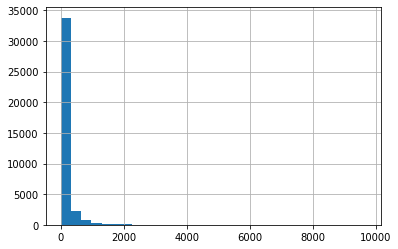

In [36]:
data['number_of_reviews'].hist(bins=30)

In [37]:
data['number_of_reviews'].isna().sum()

2543

Есть рестораны, где число отзывов не указано, но сами отзывы в колонке review есть и наоборот - примера отзывов нет, но количество отзывов больше нуля. Чтобы корректно заменить nan в number_of_reviews сначала нужно почистить reviews.

В признаке reviews пропусками являются строки содержащие значение $[[], []]$, поместим их в отдельный признак:

In [38]:
data['nan_reviews'] = data['reviews']=='[[], []]'
data.head()

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,price_nan,city_label,cuisine_nan,num_cuisines,nan_num_reviews,nan_reviews
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,False,24,False,3,False,False
1,id_1535,Stockholm,Standard,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,True,27,True,1,False,False
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,False,16,False,7,False,False
3,id_3456,Berlin,Standard,3458.0,5.0,2,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,True,3,True,1,False,True
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,False,21,False,3,False,False


Найдем все даты в отзывах с использованием модуля re, добавим признак len_dates - количество дат(кол-во примеров отзывов)

In [39]:
data['rev_dates'] = data['reviews'].str.findall('\d+/\d+/\d+')
data['len_dates'] = data['rev_dates'].apply(lambda x: len(x))
data['len_dates'].unique()

array([2, 0, 1, 3], dtype=int64)

In [40]:
data[data['len_dates']==3]

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,price_nan,city_label,cuisine_nan,num_cuisines,nan_num_reviews,nan_reviews,rev_dates,len_dates
9254,id_12965,London,"['Cafe', 'French']",12975.0,3.5,2,31.0,"[['The desserts arcade !', 'Visit today 3/1/20...",/Restaurant_Review-g186338-d1017372-Reviews-Ma...,d1017372,False,16,False,2,False,False,"[3/1/2017, 06/02/2017, 01/03/2017]",3
23348,id_450,Geneva,"['French', 'European']",453.0,4.0,2,48.0,"[['lunch 29/9/2016', 'Unplanned Great Dinner']...",/Restaurant_Review-g188057-d2706773-Reviews-Le...,d2706773,False,10,False,2,False,False,"[29/9/2016, 09/30/2016, 08/25/2016]",3


Третья дата (точнее она первая) подгружается из самого текста отзыва, удалим ее.

In [41]:
data[data['len_dates']==3].rev_dates.apply(lambda x: x.pop(0))
data[data['len_dates']==3]

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,price_nan,city_label,cuisine_nan,num_cuisines,nan_num_reviews,nan_reviews,rev_dates,len_dates
9254,id_12965,London,"['Cafe', 'French']",12975.0,3.5,2,31.0,"[['The desserts arcade !', 'Visit today 3/1/20...",/Restaurant_Review-g186338-d1017372-Reviews-Ma...,d1017372,False,16,False,2,False,False,"[06/02/2017, 01/03/2017]",3
23348,id_450,Geneva,"['French', 'European']",453.0,4.0,2,48.0,"[['lunch 29/9/2016', 'Unplanned Great Dinner']...",/Restaurant_Review-g188057-d2706773-Reviews-Le...,d2706773,False,10,False,2,False,False,"[09/30/2016, 08/25/2016]",3


In [42]:
data['len_dates'] = data['rev_dates'].apply(lambda x: len(x))
data['len_dates'].unique()

array([2, 0, 1], dtype=int64)

Когда был оставлен самый свежий отзыв?

In [43]:
from datetime import datetime

Даты сейчас представляют собой список из двух строк, необходимо привести строки к формату дат.

In [44]:
def str_to_date(row):
    return [datetime.strptime(x, '%m/%d/%Y') for x in row]
data['rev_dates']=data['rev_dates'].apply(str_to_date)
data['rev_dates']

0        [2017-12-31 00:00:00, 2017-11-20 00:00:00]
1        [2017-07-06 00:00:00, 2016-06-19 00:00:00]
2        [2018-01-08 00:00:00, 2018-01-06 00:00:00]
3                                                []
4        [2017-11-18 00:00:00, 2017-02-19 00:00:00]
                            ...                    
39995    [2017-12-16 00:00:00, 2017-11-12 00:00:00]
39996    [2017-12-21 00:00:00, 2017-12-12 00:00:00]
39997    [2016-11-03 00:00:00, 2008-04-12 00:00:00]
39998    [2017-07-11 00:00:00, 2017-06-18 00:00:00]
39999    [2016-01-31 00:00:00, 2012-07-04 00:00:00]
Name: rev_dates, Length: 40000, dtype: object

In [45]:
data['rev_dates'].max()

[datetime.datetime(2018, 2, 26, 0, 0), datetime.datetime(2018, 2, 26, 0, 0)]

Какое максимальное количество дней отделяет даты публикации отзывов, размещённых на сайте ресторана? Введите количество дней в виде целого числа.

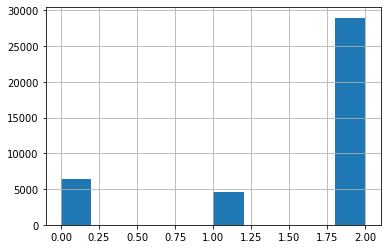

In [46]:
data['len_dates'].hist()

 В большом количестве случаев отзывов нет совсем или есть только один, т.е. расчет ведем только в случае, если есть два отзыва.

Добавляем новый признак- дней между отзывами.

In [47]:
def days_bw_revs(row):
    if row['rev_dates'] == []:
        return None
    return pd.to_datetime(row['rev_dates']).max() - pd.to_datetime(row['rev_dates']).min()

data['days_bw_revs'] = data[data['len_dates']==2].apply(days_bw_revs, axis=1).dt.days
data.head()

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,price_nan,city_label,cuisine_nan,num_cuisines,nan_num_reviews,nan_reviews,rev_dates,len_dates,days_bw_revs
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,False,24,False,3,False,False,"[2017-12-31 00:00:00, 2017-11-20 00:00:00]",2,41.0
1,id_1535,Stockholm,Standard,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,True,27,True,1,False,False,"[2017-07-06 00:00:00, 2016-06-19 00:00:00]",2,382.0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,False,16,False,7,False,False,"[2018-01-08 00:00:00, 2018-01-06 00:00:00]",2,2.0
3,id_3456,Berlin,Standard,3458.0,5.0,2,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,True,3,True,1,False,True,[],0,NaN
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,False,21,False,3,False,False,"[2017-11-18 00:00:00, 2017-02-19 00:00:00]",2,272.0


In [48]:
data['days_bw_revs'].max()

3207.0

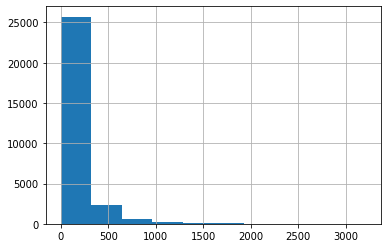

In [49]:
data['days_bw_revs'].hist()

Является ли это значение выбросом?

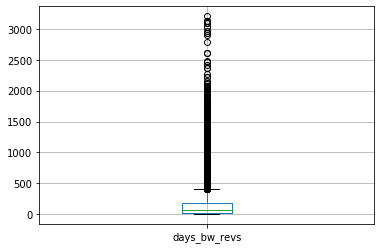

In [50]:
data.boxplot(column='days_bw_revs')

Выбросы есть и их очень много. Пока что оставляем этот признак как есть.

Протестируем полученную на текущий момент модель, предварительно удалив колонки с нецифровыми данными.

In [51]:
data.head()

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,price_nan,city_label,cuisine_nan,num_cuisines,nan_num_reviews,nan_reviews,rev_dates,len_dates,days_bw_revs
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,False,24,False,3,False,False,"[2017-12-31 00:00:00, 2017-11-20 00:00:00]",2,41.0
1,id_1535,Stockholm,Standard,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,True,27,True,1,False,False,"[2017-07-06 00:00:00, 2016-06-19 00:00:00]",2,382.0
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,False,16,False,7,False,False,"[2018-01-08 00:00:00, 2018-01-06 00:00:00]",2,2.0
3,id_3456,Berlin,Standard,3458.0,5.0,2,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,True,3,True,1,False,True,[],0,NaN
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,False,21,False,3,False,False,"[2017-11-18 00:00:00, 2017-02-19 00:00:00]",2,272.0


В колонках restaurant_id, id_ta, url_ta приведем данные к цифрам.

In [52]:
data['restaurant_id'] = data['restaurant_id'].apply(lambda x: int(x[3:]))
data['id_ta'] = data['id_ta'].apply(lambda x: int(x[1:]))
data['url_ta'] = data['url_ta'].str.split('-').apply(lambda x: int(x[1][1:]))

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
restaurant_id        40000 non-null int64
city                 40000 non-null object
cuisine_style        40000 non-null object
ranking              40000 non-null float64
rating               40000 non-null float64
price_range          40000 non-null int64
number_of_reviews    37457 non-null float64
reviews              40000 non-null object
url_ta               40000 non-null int64
id_ta                40000 non-null int64
price_nan            40000 non-null bool
city_label           40000 non-null int32
cuisine_nan          40000 non-null bool
num_cuisines         40000 non-null int64
nan_num_reviews      40000 non-null bool
nan_reviews          40000 non-null bool
rev_dates            40000 non-null object
len_dates            40000 non-null int64
days_bw_revs         28973 non-null float64
dtypes: bool(4), float64(4), int32(1), int64(6), object(4)
memory usage: 4.6+ MB


In [54]:
data.head()

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,price_nan,city_label,cuisine_nan,num_cuisines,nan_num_reviews,nan_reviews,rev_dates,len_dates,days_bw_revs
0,5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",187147,1912643,False,24,False,3,False,False,"[2017-12-31 00:00:00, 2017-11-20 00:00:00]",2,41.0
1,1535,Stockholm,Standard,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",189852,7992032,True,27,True,1,False,False,"[2017-07-06 00:00:00, 2016-06-19 00:00:00]",2,382.0
2,352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",186338,8632781,False,16,False,7,False,False,"[2018-01-08 00:00:00, 2018-01-06 00:00:00]",2,2.0
3,3456,Berlin,Standard,3458.0,5.0,2,3.0,"[[], []]",187323,1358776,True,3,True,1,False,True,[],0,NaN
4,615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",187309,6864963,False,21,False,3,False,False,"[2017-11-18 00:00:00, 2017-02-19 00:00:00]",2,272.0


В признаке number_of_reviews есть nan-значения (6.3%), поменяем их на соответствующие значения из признака len_dates:

In [55]:
data.loc[data['number_of_reviews'].isnull(),'number_of_reviews']=data['len_dates']

days_bw_revs также содержит 27.6% nan-значений, заменим их на 0, но добавим колонку с индикатором того, что значение было nan.

In [56]:
data['nan_days_bw_revs'] = data['days_bw_revs'].isna()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 20 columns):
restaurant_id        40000 non-null int64
city                 40000 non-null object
cuisine_style        40000 non-null object
ranking              40000 non-null float64
rating               40000 non-null float64
price_range          40000 non-null int64
number_of_reviews    40000 non-null float64
reviews              40000 non-null object
url_ta               40000 non-null int64
id_ta                40000 non-null int64
price_nan            40000 non-null bool
city_label           40000 non-null int32
cuisine_nan          40000 non-null bool
num_cuisines         40000 non-null int64
nan_num_reviews      40000 non-null bool
nan_reviews          40000 non-null bool
rev_dates            40000 non-null object
len_dates            40000 non-null int64
days_bw_revs         28973 non-null float64
nan_days_bw_revs     40000 non-null bool
dtypes: bool(5), float64(4), int32(1), int64

In [57]:
data['days_bw_revs'].fillna(0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 20 columns):
restaurant_id        40000 non-null int64
city                 40000 non-null object
cuisine_style        40000 non-null object
ranking              40000 non-null float64
rating               40000 non-null float64
price_range          40000 non-null int64
number_of_reviews    40000 non-null float64
reviews              40000 non-null object
url_ta               40000 non-null int64
id_ta                40000 non-null int64
price_nan            40000 non-null bool
city_label           40000 non-null int32
cuisine_nan          40000 non-null bool
num_cuisines         40000 non-null int64
nan_num_reviews      40000 non-null bool
nan_reviews          40000 non-null bool
rev_dates            40000 non-null object
len_dates            40000 non-null int64
days_bw_revs         40000 non-null float64
nan_days_bw_revs     40000 non-null bool
dtypes: bool(5), float64(4), int32(1), int64

In [58]:
# удалим object-features
data1=data.drop(['city','cuisine_style','reviews','rev_dates'], axis=1)
data1.head()

,restaurant_id,ranking,rating,price_range,number_of_reviews,url_ta,id_ta,price_nan,city_label,cuisine_nan,num_cuisines,nan_num_reviews,nan_reviews,len_dates,days_bw_revs,nan_days_bw_revs
0,5569,5570.0,3.5,2,194.0,187147,1912643,False,24,False,3,False,False,2,41.0,False
1,1535,1537.0,4.0,2,10.0,189852,7992032,True,27,True,1,False,False,2,382.0,False
2,352,353.0,4.5,3,688.0,186338,8632781,False,16,False,7,False,False,2,2.0,False
3,3456,3458.0,5.0,2,3.0,187323,1358776,True,3,True,1,False,True,0,0.0,True
4,615,621.0,4.0,2,84.0,187309,6864963,False,21,False,3,False,False,2,272.0,False


test2=test_my_model(data1)
test2

Достигнуто значительное улучшение модели почти в 2 раза. Попробуем добавить еще три новых признака, будем тестировать модель после добавления каждого из них.

Первый признак: добавим признак кода страны. Для этого создадим словарь стран и городов.

In [59]:
data['city'].unique()

array(['Paris', 'Stockholm', 'London', 'Berlin', 'Munich', 'Oporto',
       'Milan', 'Bratislava', 'Vienna', 'Rome', 'Barcelona', 'Madrid',
       'Dublin', 'Brussels', 'Zurich', 'Warsaw', 'Budapest', 'Copenhagen',
       'Amsterdam', 'Lyon', 'Hamburg', 'Lisbon', 'Prague', 'Oslo',
       'Helsinki', 'Edinburgh', 'Geneva', 'Ljubljana', 'Athens',
       'Luxembourg', 'Krakow'], dtype=object)

In [60]:
country = {
    'London': 'United Kingdom',
    'Paris': 'France',
    'Madrid': 'Spain',
    'Barcelona': 'Spain',
    'Berlin': 'Germany',
    'Milan': 'Italy',
    'Rome': 'Italy',
    'Prague': 'Czech Republic',
    'Lisbon': 'Portugal',
    'Vienna': 'Austria',
    'Amsterdam': 'Netherlands',
    'Brussels': 'Belgium',
    'Hamburg': 'Germany',
    'Munich': 'Germany',
    'Lyon': 'France',
    'Stockholm': 'Sweden',
    'Budapest': 'Hungary',
    'Warsaw': 'Poland',
    'Dublin': 'Ireland' ,
    'Copenhagen': 'Denmark',
    'Athens': 'Greece',
    'Edinburgh': 'United Kingdom',
    'Zurich': 'Switzerland',
    'Oporto': 'Portugal',
    'Geneva': 'Switzerland',
    'Krakow': 'Poland',
    'Oslo': 'Norway',
    'Helsinki': 'Finland',
    'Bratislava': 'Slovakia',
    'Luxembourg': 'Luxembourg',
    'Ljubljana': 'Slovenia'
}

data['country'] = data['city'].map(country)
data.head()

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,...,city_label,cuisine_nan,num_cuisines,nan_num_reviews,nan_reviews,rev_dates,len_dates,days_bw_revs,nan_days_bw_revs,country
0,5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",187147,1912643,...,24,False,3,False,False,"[2017-12-31 00:00:00, 2017-11-20 00:00:00]",2,41.0,False,France
1,1535,Stockholm,Standard,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",189852,7992032,...,27,True,1,False,False,"[2017-07-06 00:00:00, 2016-06-19 00:00:00]",2,382.0,False,Sweden
2,352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",186338,8632781,...,16,False,7,False,False,"[2018-01-08 00:00:00, 2018-01-06 00:00:00]",2,2.0,False,United Kingdom
3,3456,Berlin,Standard,3458.0,5.0,2,3.0,"[[], []]",187323,1358776,...,3,True,1,False,True,[],0,0.0,True,Germany
4,615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",187309,6864963,...,21,False,3,False,False,"[2017-11-18 00:00:00, 2017-02-19 00:00:00]",2,272.0,False,Germany


Используем sklearn.preprocessign.LabelEncoder для добавления признака-код страны.

In [61]:
country_label = LabelEncoder()
country_label.fit(data['country'])
data['country_code'] = country_label.transform(data['country'])

In [62]:
data.head()

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,...,cuisine_nan,num_cuisines,nan_num_reviews,nan_reviews,rev_dates,len_dates,days_bw_revs,nan_days_bw_revs,country,country_code
0,5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",187147,1912643,...,False,3,False,False,"[2017-12-31 00:00:00, 2017-11-20 00:00:00]",2,41.0,False,France,5
1,1535,Stockholm,Standard,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",189852,7992032,...,True,1,False,False,"[2017-07-06 00:00:00, 2016-06-19 00:00:00]",2,382.0,False,Sweden,19
2,352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",186338,8632781,...,False,7,False,False,"[2018-01-08 00:00:00, 2018-01-06 00:00:00]",2,2.0,False,United Kingdom,21
3,3456,Berlin,Standard,3458.0,5.0,2,3.0,"[[], []]",187323,1358776,...,True,1,False,True,[],0,0.0,True,Germany,6
4,615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",187309,6864963,...,False,3,False,False,"[2017-11-18 00:00:00, 2017-02-19 00:00:00]",2,272.0,False,Germany,6


Тестируем модель с кодом страны.

In [63]:
data1=data.drop(['city','cuisine_style','reviews','rev_dates','country'], axis=1)
test3=test_my_model(data1)

In [64]:
test3

0.21372049999999998

Попробуем скорректировать результаты предсказания путем округления их до 0.5. Для этого перепишем функцию проверки модели.

In [65]:
def improved_test_my_model(data):
    X = data.drop(['rating'], axis = 1)
    y = data['rating']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    # Создаём модель
    regr = RandomForestRegressor(n_estimators=100)

    # Обучаем модель на тестовом наборе данных
    regr.fit(X_train, y_train)

    # Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
    # Предсказанные значения записываем в переменную y_pred
    y_pred = regr.predict(X_test)
    
    # округление результатов предсказания
    for i in y_pred:
        if i<=0.5:
            i=0
        elif i<=1.5:
            i=1.0
        elif i<=1.75:
            i=1.5
        elif i<=2.25:
            i=2.0
        elif i<=2.75:
            i=2.5
        elif i<=3.25:
            i=3.0
        elif i<=3.75:
            i=3.5
        elif i<=4.25:
            i=4.0
        elif i<=4.75:
            i=4.5
        else:
            i=5.0
    
    # Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
    return metrics.mean_absolute_error(y_test, y_pred)

Протестируем повторно с учучшенной функцией проверки.

In [66]:
test4=improved_test_my_model(data1)
test4

0.2175995

Округление не привело к улучшению результата, даже немного его ухудшило. Дальнейшее тестирование будем проводить с помощью функции проверки без округления.

Добавим признак определяющий актуальность самого последнего отзыва, т.е. разницу между текущей датой и датой самого последнего отзыва по ресторану.

In [67]:
CURRENT_DATE= pd.to_datetime('02/07/2020')

In [68]:
def revs_relevance(row):
    return CURRENT_DATE-pd.to_datetime(row['rev_dates']).max()

data['revs_relevance'] = data[data['len_dates']>0].apply(revs_relevance, axis=1).dt.days
data.head()

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,...,num_cuisines,nan_num_reviews,nan_reviews,rev_dates,len_dates,days_bw_revs,nan_days_bw_revs,country,country_code,revs_relevance
0,5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",187147,1912643,...,3,False,False,"[2017-12-31 00:00:00, 2017-11-20 00:00:00]",2,41.0,False,France,5,768.0
1,1535,Stockholm,Standard,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",189852,7992032,...,1,False,False,"[2017-07-06 00:00:00, 2016-06-19 00:00:00]",2,382.0,False,Sweden,19,946.0
2,352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",186338,8632781,...,7,False,False,"[2018-01-08 00:00:00, 2018-01-06 00:00:00]",2,2.0,False,United Kingdom,21,760.0
3,3456,Berlin,Standard,3458.0,5.0,2,3.0,"[[], []]",187323,1358776,...,1,False,True,[],0,0.0,True,Germany,6,NaN
4,615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",187309,6864963,...,3,False,False,"[2017-11-18 00:00:00, 2017-02-19 00:00:00]",2,272.0,False,Germany,6,811.0


Вынесем nan в отдельную колонку и заполним их значением 0.

In [69]:
data['nan_revs_relevance'] = data['revs_relevance'].isna()
data['revs_relevance'].fillna(0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 24 columns):
restaurant_id         40000 non-null int64
city                  40000 non-null object
cuisine_style         40000 non-null object
ranking               40000 non-null float64
rating                40000 non-null float64
price_range           40000 non-null int64
number_of_reviews     40000 non-null float64
reviews               40000 non-null object
url_ta                40000 non-null int64
id_ta                 40000 non-null int64
price_nan             40000 non-null bool
city_label            40000 non-null int32
cuisine_nan           40000 non-null bool
num_cuisines          40000 non-null int64
nan_num_reviews       40000 non-null bool
nan_reviews           40000 non-null bool
rev_dates             40000 non-null object
len_dates             40000 non-null int64
days_bw_revs          40000 non-null float64
nan_days_bw_revs      40000 non-null bool
country               40

Проверяем модель еще раз.

In [70]:
data1=data.drop(['city','cuisine_style','reviews','rev_dates','country'], axis=1)
data1.head()

,restaurant_id,ranking,rating,price_range,number_of_reviews,url_ta,id_ta,price_nan,city_label,cuisine_nan,num_cuisines,nan_num_reviews,nan_reviews,len_dates,days_bw_revs,nan_days_bw_revs,country_code,revs_relevance,nan_revs_relevance
0,5569,5570.0,3.5,2,194.0,187147,1912643,False,24,False,3,False,False,2,41.0,False,5,768.0,False
1,1535,1537.0,4.0,2,10.0,189852,7992032,True,27,True,1,False,False,2,382.0,False,19,946.0,False
2,352,353.0,4.5,3,688.0,186338,8632781,False,16,False,7,False,False,2,2.0,False,21,760.0,False
3,3456,3458.0,5.0,2,3.0,187323,1358776,True,3,True,1,False,True,0,0.0,True,6,0.0,True
4,615,621.0,4.0,2,84.0,187309,6864963,False,21,False,3,False,False,2,272.0,False,6,811.0,False


In [71]:
test5=test_my_model(data1)
test5

0.21665

 Добавление этого признака улучшений модели не дает, удалим его из дата сета.

In [72]:
data=data.drop(['revs_relevance','nan_revs_relevance'], axis=1)
data.head()

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,...,cuisine_nan,num_cuisines,nan_num_reviews,nan_reviews,rev_dates,len_dates,days_bw_revs,nan_days_bw_revs,country,country_code
0,5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",187147,1912643,...,False,3,False,False,"[2017-12-31 00:00:00, 2017-11-20 00:00:00]",2,41.0,False,France,5
1,1535,Stockholm,Standard,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",189852,7992032,...,True,1,False,False,"[2017-07-06 00:00:00, 2016-06-19 00:00:00]",2,382.0,False,Sweden,19
2,352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",186338,8632781,...,False,7,False,False,"[2018-01-08 00:00:00, 2018-01-06 00:00:00]",2,2.0,False,United Kingdom,21
3,3456,Berlin,Standard,3458.0,5.0,2,3.0,"[[], []]",187323,1358776,...,True,1,False,True,[],0,0.0,True,Germany,6
4,615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",187309,6864963,...,False,3,False,False,"[2017-11-18 00:00:00, 2017-02-19 00:00:00]",2,272.0,False,Germany,6


Посчитаем сколько ресторанов есть в каждом городе и добавим это как новый признак.

In [73]:
restaurants_in_city=data['city'].value_counts(ascending=False)
data['restaurant_in_city']=data['city'].apply(lambda x: restaurants_in_city[x])

In [74]:
data.head()

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,...,num_cuisines,nan_num_reviews,nan_reviews,rev_dates,len_dates,days_bw_revs,nan_days_bw_revs,country,country_code,restaurant_in_city
0,5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",187147,1912643,...,3,False,False,"[2017-12-31 00:00:00, 2017-11-20 00:00:00]",2,41.0,False,France,5,4897
1,1535,Stockholm,Standard,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",189852,7992032,...,1,False,False,"[2017-07-06 00:00:00, 2016-06-19 00:00:00]",2,382.0,False,Sweden,19,820
2,352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",186338,8632781,...,7,False,False,"[2018-01-08 00:00:00, 2018-01-06 00:00:00]",2,2.0,False,United Kingdom,21,5757
3,3456,Berlin,Standard,3458.0,5.0,2,3.0,"[[], []]",187323,1358776,...,1,False,True,[],0,0.0,True,Germany,6,2155
4,615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",187309,6864963,...,3,False,False,"[2017-11-18 00:00:00, 2017-02-19 00:00:00]",2,272.0,False,Germany,6,893


Посчитаем средний рейтинг (rank) ресторана в привязке к городу.

In [75]:
mean_rank=data.groupby(['city'])['ranking'].mean()
mean_rank

city
Amsterdam     1580.943831
Athens         881.108280
Barcelona     3914.144111
Berlin        3266.237123
Bratislava     453.112957
Brussels      1535.347170
Budapest      1220.811275
Copenhagen     974.699545
Dublin         983.725111
Edinburgh      873.041946
Geneva         708.286902
Hamburg       1355.140148
Helsinki       566.909574
Krakow         614.553047
Lisbon        1877.126154
Ljubljana      239.907104
London        8198.461873
Luxembourg     313.719048
Lyon          1307.559417
Madrid        4388.423102
Milan         3098.143929
Munich        1370.539754
Oporto         738.473684
Oslo           568.288312
Paris         6933.012048
Prague        2077.387387
Rome          2983.397498
Stockholm     1242.386585
Vienna        1706.102058
Warsaw        1063.039890
Zurich         782.486989
Name: ranking, dtype: float64

In [76]:
data['mean_city_rank']=data['city'].apply(lambda x: mean_rank[x])

Добавим признак отношения среднего ранга ресторана по городу.

In [77]:
data['rank_on_num_restaurants'] = (data['ranking']-data['mean_city_rank'])/data['restaurant_in_city']
data.head()

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,...,nan_reviews,rev_dates,len_dates,days_bw_revs,nan_days_bw_revs,country,country_code,restaurant_in_city,mean_city_rank,rank_on_num_restaurants
0,5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",187147,1912643,...,False,"[2017-12-31 00:00:00, 2017-11-20 00:00:00]",2,41.0,False,France,5,4897,6933.012048,-0.278336
1,1535,Stockholm,Standard,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",189852,7992032,...,False,"[2017-07-06 00:00:00, 2016-06-19 00:00:00]",2,382.0,False,Sweden,19,820,1242.386585,0.359285
2,352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",186338,8632781,...,False,"[2018-01-08 00:00:00, 2018-01-06 00:00:00]",2,2.0,False,United Kingdom,21,5757,8198.461873,-1.362769
3,3456,Berlin,Standard,3458.0,5.0,2,3.0,"[[], []]",187323,1358776,...,True,[],0,0.0,True,Germany,6,2155,3266.237123,0.088985
4,615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",187309,6864963,...,False,"[2017-11-18 00:00:00, 2017-02-19 00:00:00]",2,272.0,False,Germany,6,893,1370.539754,-0.839350


Тестируем.

In [78]:
data1=data.drop(['city','cuisine_style','reviews','rev_dates','country'], axis=1)
data1.head()

,restaurant_id,ranking,rating,price_range,number_of_reviews,url_ta,id_ta,price_nan,city_label,cuisine_nan,num_cuisines,nan_num_reviews,nan_reviews,len_dates,days_bw_revs,nan_days_bw_revs,country_code,restaurant_in_city,mean_city_rank,rank_on_num_restaurants
0,5569,5570.0,3.5,2,194.0,187147,1912643,False,24,False,3,False,False,2,41.0,False,5,4897,6933.012048,-0.278336
1,1535,1537.0,4.0,2,10.0,189852,7992032,True,27,True,1,False,False,2,382.0,False,19,820,1242.386585,0.359285
2,352,353.0,4.5,3,688.0,186338,8632781,False,16,False,7,False,False,2,2.0,False,21,5757,8198.461873,-1.362769
3,3456,3458.0,5.0,2,3.0,187323,1358776,True,3,True,1,False,True,0,0.0,True,6,2155,3266.237123,0.088985
4,615,621.0,4.0,2,84.0,187309,6864963,False,21,False,3,False,False,2,272.0,False,6,893,1370.539754,-0.839350


In [79]:
test6=test_my_model(data1)
test6

0.20613149999999997

In [80]:
data['country'].unique()

array(['France', 'Sweden', 'United Kingdom', 'Germany', 'Portugal',
       'Italy', 'Slovakia', 'Austria', 'Spain', 'Ireland', 'Belgium',
       'Switzerland', 'Poland', 'Hungary', 'Denmark', 'Netherlands',
       'Czech Republic', 'Norway', 'Finland', 'Slovenia', 'Greece',
       'Luxembourg'], dtype=object)

Попробуем несколько переделать наш дата сет, а именно, вместо меток с номером города и страны, поробуем поставить dummy variables. Позволит ли этот ход улучшить модель?

In [81]:
dummy=pd.get_dummies(data['country'])
dummy.head()

,Austria,Belgium,Czech Republic,Denmark,Finland,France,Germany,Greece,Hungary,Ireland,...,Netherlands,Norway,Poland,Portugal,Slovakia,Slovenia,Spain,Sweden,Switzerland,United Kingdom
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
data1=pd.concat([data,dummy], axis=1)
data1.head()

,restaurant_id,city,cuisine_style,ranking,rating,price_range,number_of_reviews,reviews,url_ta,id_ta,...,Netherlands,Norway,Poland,Portugal,Slovakia,Slovenia,Spain,Sweden,Switzerland,United Kingdom
0,5569,Paris,"['European', 'French', 'International']",5570.0,3.5,2,194.0,"[['Good food at your doorstep', 'A good hotel ...",187147,1912643,...,0,0,0,0,0,0,0,0,0,0
1,1535,Stockholm,Standard,1537.0,4.0,2,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",189852,7992032,...,0,0,0,0,0,0,0,1,0,0
2,352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,3,688.0,"[['Catch up with friends', 'Not exceptional'],...",186338,8632781,...,0,0,0,0,0,0,0,0,0,1
3,3456,Berlin,Standard,3458.0,5.0,2,3.0,"[[], []]",187323,1358776,...,0,0,0,0,0,0,0,0,0,0
4,615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,2,84.0,"[['Best place to try a Bavarian food', 'Nice b...",187309,6864963,...,0,0,0,0,0,0,0,0,0,0


In [84]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 47 columns):
restaurant_id              40000 non-null int64
city                       40000 non-null object
cuisine_style              40000 non-null object
ranking                    40000 non-null float64
rating                     40000 non-null float64
price_range                40000 non-null int64
number_of_reviews          40000 non-null float64
reviews                    40000 non-null object
url_ta                     40000 non-null int64
id_ta                      40000 non-null int64
price_nan                  40000 non-null bool
city_label                 40000 non-null int32
cuisine_nan                40000 non-null bool
num_cuisines               40000 non-null int64
nan_num_reviews            40000 non-null bool
nan_reviews                40000 non-null bool
rev_dates                  40000 non-null object
len_dates                  40000 non-null int64
days_bw_revs         

Тестируем.

In [86]:
data1=data1.drop(['city','cuisine_style','reviews','rev_dates','country','country_code'], axis=1)
test7=test_my_model(data1)
test7

0.21054699999999998

 Улучшения модели не произошло, добавим dummies по городам.

In [88]:
dummy1=pd.get_dummies(data['city'])
data2=pd.concat([data,dummy,dummy1], axis=1)
data2=data2.drop(['city','cuisine_style','reviews','rev_dates','country','country_code','city_label'], axis=1)
test8=test_my_model(data2)
test8

0.201968

In [89]:
test9=improved_test_my_model(data2)
test9

0.2011635

Как ни странно, в случае использования dummies, округление в тесте проверки также приносит небольшое улучшение результата.

Добавление все новых признаков существенного улучшения результатов не приносит, мы можем остановиться на наборе признаков data2.

In [90]:
data2.shape

(40000, 71)

In [91]:
data2.head()

,restaurant_id,ranking,rating,price_range,number_of_reviews,url_ta,id_ta,price_nan,cuisine_nan,num_cuisines,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
0,5569,5570.0,3.5,2,194.0,187147,1912643,False,False,3,...,0,0,0,1,0,0,0,0,0,0
1,1535,1537.0,4.0,2,10.0,189852,7992032,True,True,1,...,0,0,0,0,0,0,1,0,0,0
2,352,353.0,4.5,3,688.0,186338,8632781,False,False,7,...,0,0,0,0,0,0,0,0,0,0
3,3456,3458.0,5.0,2,3.0,187323,1358776,True,True,1,...,0,0,0,0,0,0,0,0,0,0
4,615,621.0,4.0,2,84.0,187309,6864963,False,False,3,...,1,0,0,0,0,0,0,0,0,0


In [92]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 71 columns):
restaurant_id              40000 non-null int64
ranking                    40000 non-null float64
rating                     40000 non-null float64
price_range                40000 non-null int64
number_of_reviews          40000 non-null float64
url_ta                     40000 non-null int64
id_ta                      40000 non-null int64
price_nan                  40000 non-null bool
cuisine_nan                40000 non-null bool
num_cuisines               40000 non-null int64
nan_num_reviews            40000 non-null bool
nan_reviews                40000 non-null bool
len_dates                  40000 non-null int64
days_bw_revs               40000 non-null float64
nan_days_bw_revs           40000 non-null bool
restaurant_in_city         40000 non-null int64
mean_city_rank             40000 non-null float64
rank_on_num_restaurants    40000 non-null float64
Austria             